# Imports

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# Load data from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/Shareddrives/cis522_project")

In [ ]:
articles = pd.read_csv('data/articles.csv')
customers = pd.read_csv('data/customers.csv')
transactions = pd.read_csv('data/transactions_train.csv')

# Articles Data

### First Look of Articles Data
1. It contains 105542 different articles in total.

#### columns
1. article_id: A unique identifier of every article.
1. product_code, prod_name: A unique identifier of every product and its name (not the same).
1. product_type, product_type_name, product_group_name: The group of product_code and its name
1. graphical_appearance_no, graphical_appearance_name: The group of graphics and its name
1. colour_group_code, colour_group_name: The group of color and its name
1. perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name: The added color info
1. department_no, department_name: A unique identifier of every dep and its name
1. index_code, index_name: A unique identifier of every index and its name
1. index_group_no, index_group_name: A group of indeces and its name
1. section_no, section_name: A unique identifier of every section and its name

1. garment_group_no, garment_group_name: A unique identifier of every garment and its name

1. detail_desc: Details

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
articles.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


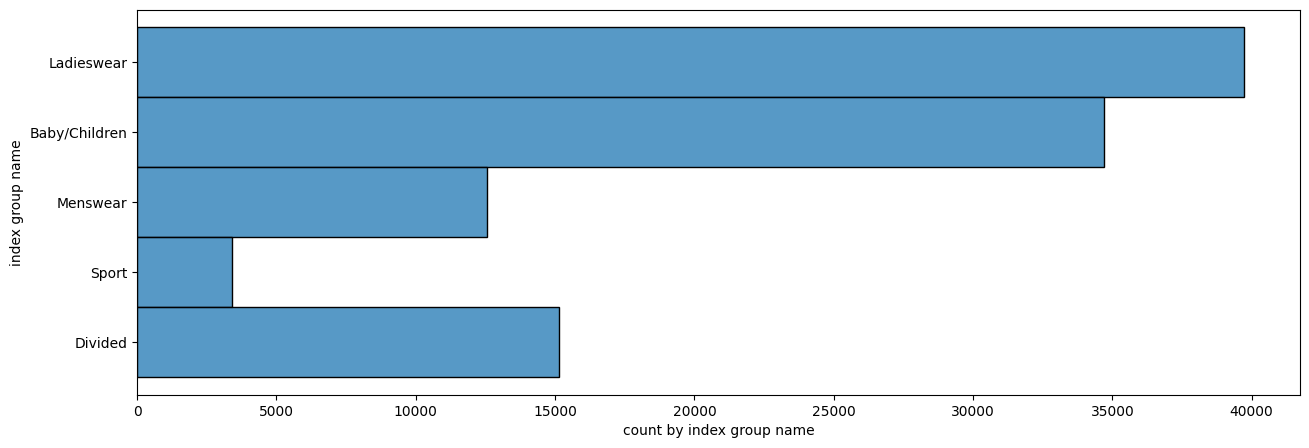

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.histplot(data=articles, y='index_group_name')
ax.set_xlabel('count by index group name')
ax.set_ylabel('index group name')
plt.show()

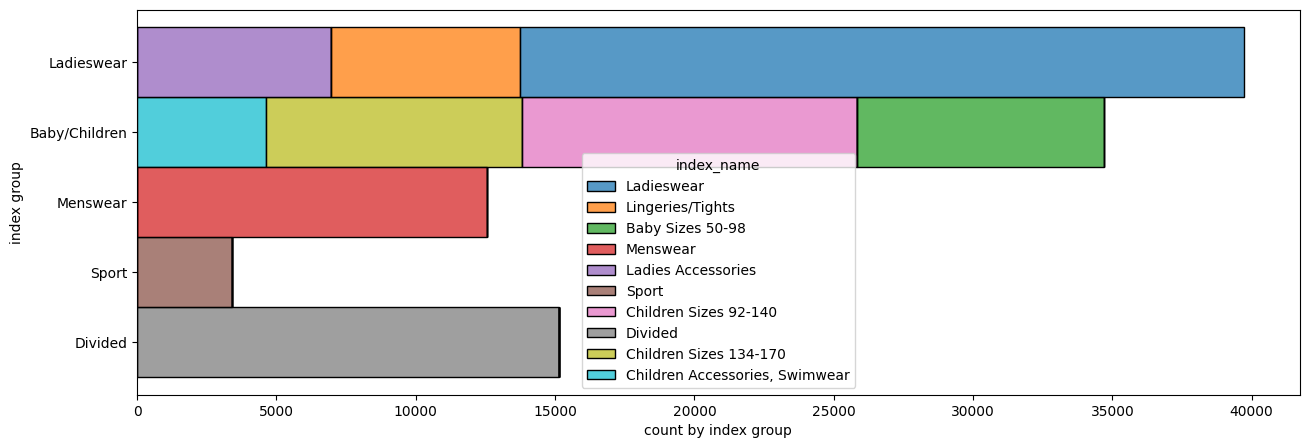

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.histplot(data=articles, y='index_group_name', color='orange', hue='index_name', multiple="stack")
ax.set_xlabel('count by index group')
ax.set_ylabel('index group')
plt.show()

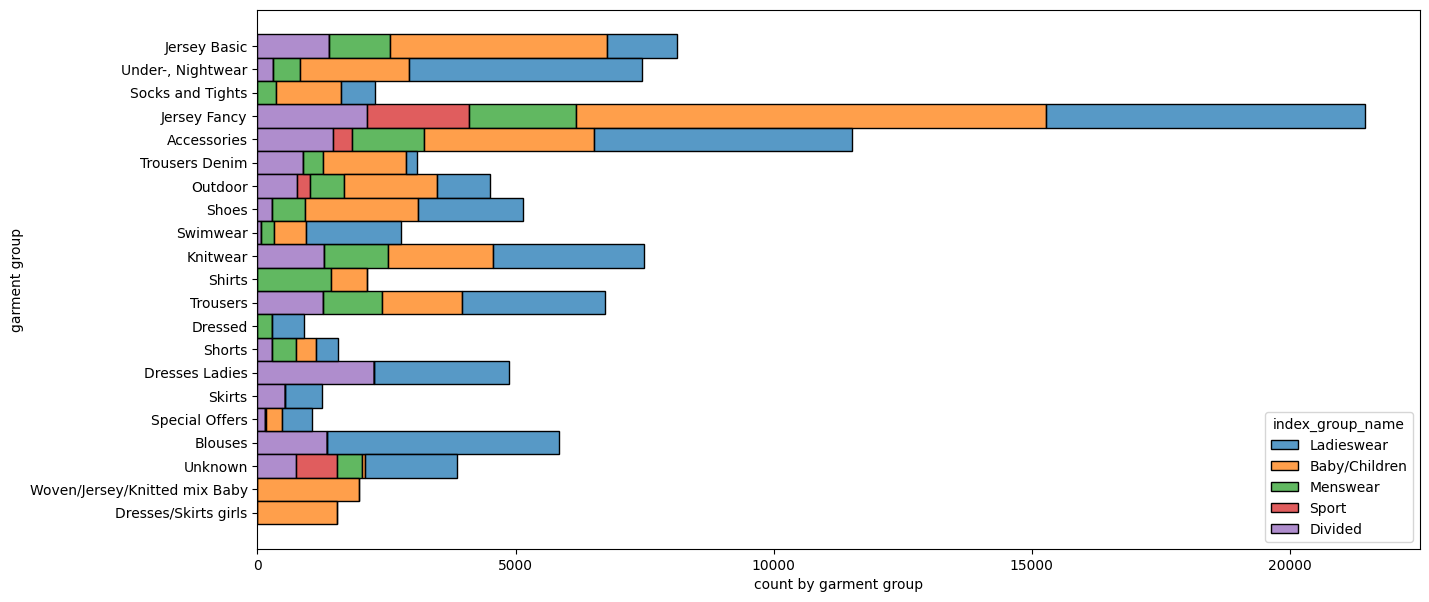

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

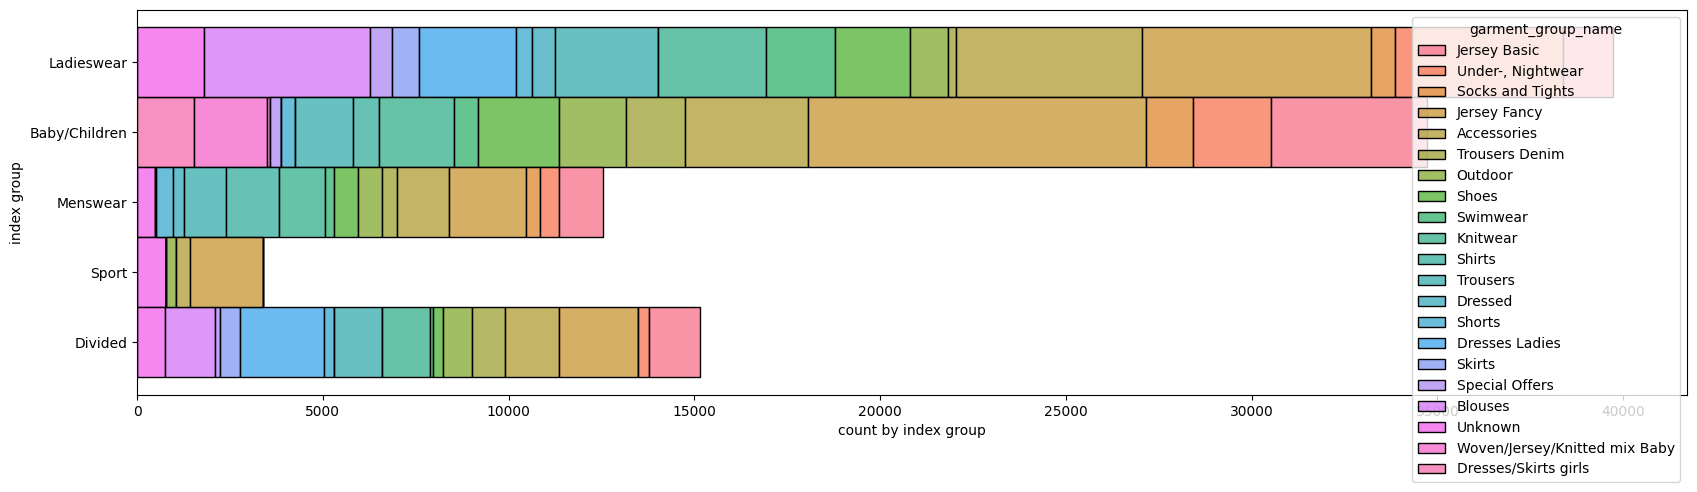

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.histplot(data=articles, y='index_group_name', color='orange', hue='garment_group_name', multiple="stack")
ax.set_xlabel('count by index group')
ax.set_ylabel('index group')
plt.show()

# Customers Data

In [ ]:
customers.head(1)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


We first visualize customers across different ages.

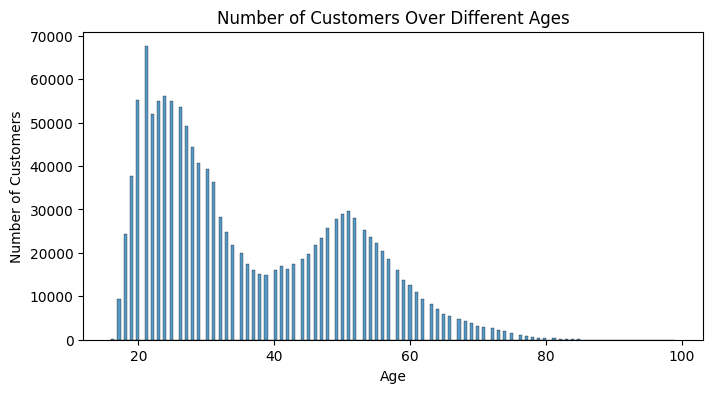

In [ ]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.histplot(data=customers, x='age')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers Over Different Ages')
plt.show()

We then explore the number of customers for each of club_member_status.

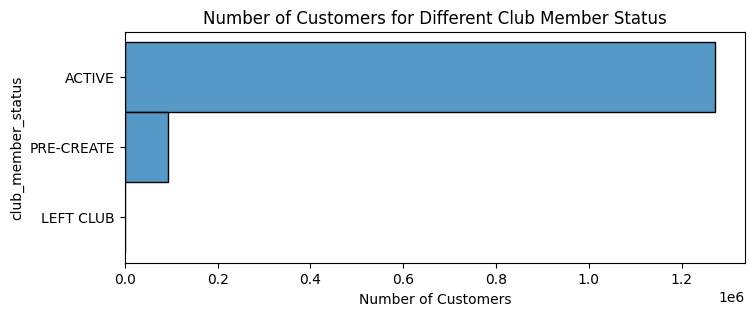

In [ ]:
f, ax = plt.subplots(figsize=(8, 3))
ax = sns.histplot(data=customers, y='club_member_status')
ax.set_ylabel('club_member_status')
ax.set_xlabel('Number of Customers')
ax.set_title('Number of Customers for Different Club Member Status')
plt.show()

Now we explore customers across fashion_news_frequency. Note that 'NONE' and 'None' both appear in the fashion_news_frequency, we unify them and keep only None.

In [ ]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [ ]:
customers = customers.replace("NONE", "None")

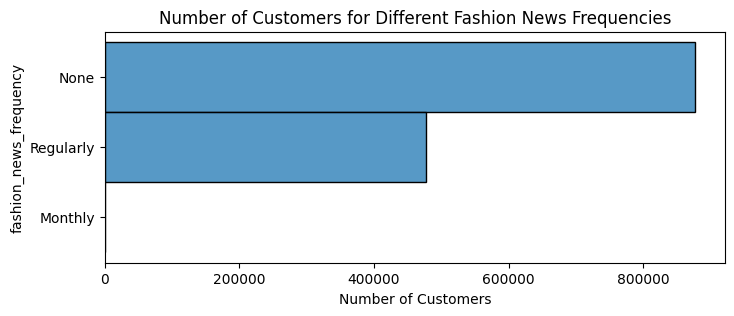

In [ ]:
f, ax = plt.subplots(figsize=(8, 3))
ax = sns.histplot(data=customers, y='fashion_news_frequency')
ax.set_ylabel('fashion_news_frequency')
ax.set_xlabel('Number of Customers')
ax.set_title('Number of Customers for Different Fashion News Frequencies')
plt.show()

Lastly, for the attribtue 'Active' and 'FN', note that both non-active and potential missing values are represented by nan and we cannot tell them apart here. We will later drop the two columns. 

In [ ]:
print(customers['Active'].unique())
print(customers['FN'].unique())

[nan  1.]
[nan  1.]


# Transaction Data

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
transactions.head(1)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2


We first explore the proportion of transactions on sales channel.

In [ ]:
transactions['sales_channel_id'].unique()

array([2, 1])

In [ ]:
channel_1_proportion = len(transactions[transactions['sales_channel_id']==1])/len(transactions)
channel_2_proportion = len(transactions[transactions['sales_channel_id']==2])/len(transactions)

Text(0.5, 1.0, 'Sales Channels')

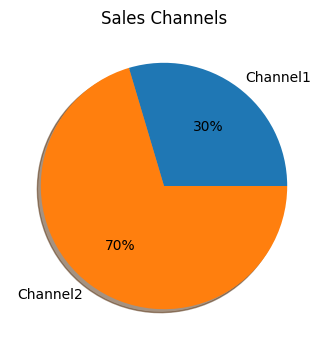

In [ ]:
plt.figure(figsize=(4, 4))
labels = ['Channel1', 'Channel2']
channel_1 = transactions[transactions['sales_channel_id']==1]
size = [channel_1_proportion, channel_2_proportion]
plt.pie(size, labels = labels, shadow=True, autopct='%.0f%%')
plt.title('Sales Channels')

We then explore the number of transactions over time (in years).

In [ ]:
transactions['year']= pd.DatetimeIndex(transactions['t_dat']).year
grouped_transactions = transactions.groupby(by = 'year').count().reset_index()
count_by_year = grouped_transactions[['year','customer_id']].rename(columns = {'customer_id':'count'})
count_by_year 

In [ ]:
f, ax = plt.subplots(figsize=(5, 3))
ax = sns.barplot(data=count_by_year , x='year',y='count')
ax.set_ylabel('club_member_status')
ax.set_xlabel('Number of Customers')
ax.set_title('Number of Customers for Different Club Member Status')
plt.show()

# Data Cleaning

For this project, we would like to focus on the recommendation of ladywear articles. Therefore, we will first clean the data in the following way:
0. Drop columns 'Active','FN', and 'postal_code' in customers.
1. Filter articles to keep only items in ladieswear.
2. Filter transactions to keep only those on ladieswear articles.
3. Filter customers to keep only those who has an existing transaction record on the filtered transactions (who has purchased ladieswear articles)

In [ ]:
# drop active and FN columns then drop rows with null values
customers = customers.drop(columns = ['Active','FN','postal_code'])
customers = customers.dropna()

In [ ]:
# filter articles
ladieswear = articles[articles['index_group_name']=='Ladieswear']

In [ ]:
# filter transaction
lw_article_ids = ladieswear['article_id']
lw_transactions = transactions[transactions['article_id'].isin(lw_article_ids)]
len(transactions)

31788324

In [ ]:
# filter customers
lw_customer_ids = lw_transactions['customer_id']
lw_customers = customers[customers['customer_id'].isin(lw_customer_ids)]
len(lw_customers)

1174046

To further reduce the dimensionality of the data, we consider only the most bought (ladieswear) articles and customers who have made most transactions.
1. Filter customers to keep random 1000 customers among those who made more than 50 transactions.
2. Filter transactions to keep those made by the filtered customers.
3. Filter articles to keep top 2000 articles bought most. 
4. Filter transactions and customer again to keep only those associated with the popular articles. 

In [ ]:
# filter customers
grouped_tran_df = lw_transactions.groupby('customer_id').count().reset_index()[['customer_id','article_id']]
active_customer_ids = grouped_tran_df[grouped_tran_df['article_id']>=50].sample(5000)['customer_id']
active_customers_df = lw_customers[lw_customers['customer_id'].isin(active_customer_ids)]

In [ ]:
# filter transactions
active_customers_tran_df = lw_transactions[lw_transactions['customer_id'].isin(active_customer_ids)]
len(active_customers_tran_df)

451110

In [ ]:
# filter articles
grouped_tran_df = active_customers_tran_df.groupby('article_id').count().reset_index()[['article_id','customer_id']]
sorted_grouped_tran = grouped_tran_df.sort_values('customer_id',ascending=False)
popular_article_ids = sorted_grouped_tran.head(2000)['article_id']
cleaned_articles = ladieswear[ladieswear['article_id'].isin(popular_article_ids)]
cleaned_articles = cleaned_articles.dropna(subset=['detail_desc'])
popular_article_ids = cleaned_articles['article_id']
len(cleaned_articles)

1988

In [ ]:
# filter transactions on the resulting articles
cleaned_transactions = active_customers_tran_df[active_customers_tran_df['article_id'].isin(popular_article_ids)]
len(cleaned_transactions)

146499

In [ ]:
# filter customers on the resulting transactions
cleaned_customers = active_customers_df[active_customers_df['customer_id'].isin(cleaned_transactions['customer_id'])]
len(cleaned_customers)

4980

In [ ]:
# save the resulting tables to csv files 
cleaned_customers.to_csv("cleaned_data/filtered_customer.csv")
cleaned_transactions.to_csv("cleaned_data/filtered_transactions.csv")
cleaned_articles.to_csv("cleaned_data/filtered_articles.csv")